In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cicddos2019_dataset.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431367,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431368,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431369,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [4]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

ValueError: could not convert string to float: 'UDP'

In [6]:
# Remove all features that have correlation value more than 0.9
df = df.drop(['Subflow Bwd Packets', 'Subflow Bwd Bytes'], axis=1)

In [7]:
Y = df['Class']
X = df.drop(['Class'], axis=1)

# Select X only numerical data
X = X.select_dtypes(include=np.number)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

recalls = []
precisions = []
accuracies = []

for n in range(1,5):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, Y_train)
    rf.score(X_test, Y_test)

    y_pred = rf.predict(X_test)
    recalls.append(recall_score(Y_test, y_pred, average="binary", pos_label="Attack"))
    precisions.append(precision_score(Y_test, y_pred, average="binary", pos_label="Attack"))
    accuracies.append(accuracy_score(Y_test, y_pred))

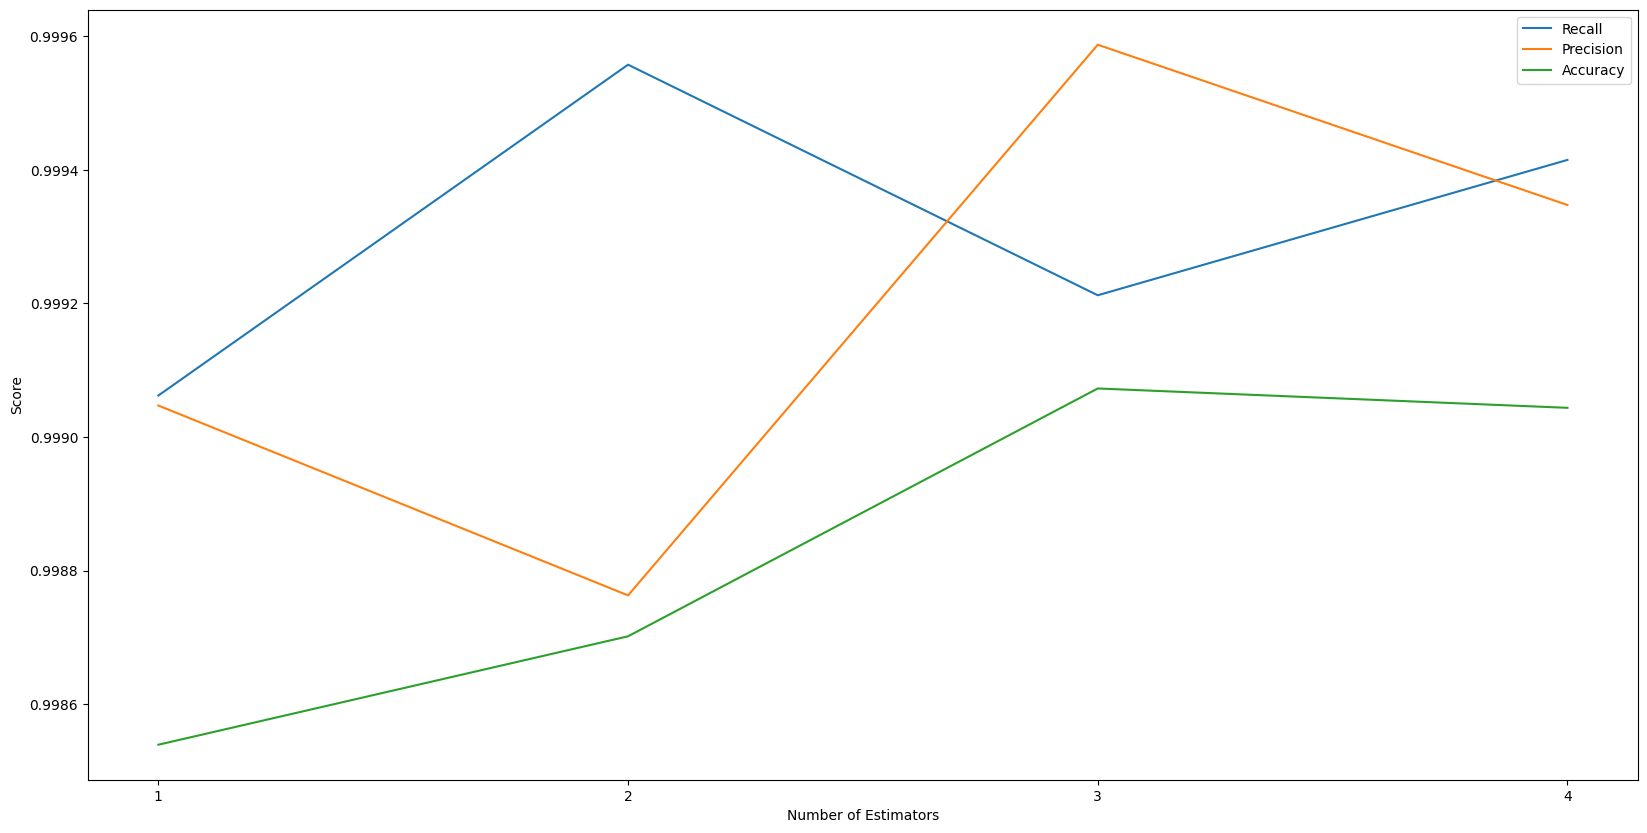

In [11]:
# Plot graph
plt.figure(figsize=(20,10))
plt.plot(range(1,5), recalls, label="Recall")
plt.plot(range(1,5), precisions, label="Precision")
plt.plot(range(1,5), accuracies, label="Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.xticks(range(1,5))
plt.legend()
plt.show()